#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from pandas import json_normalize

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df_raw = pd.read_json(url)

df = json_normalize(df_raw.to_dict('records'))

In [3]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformação

In [6]:
df.columns = (
    df.columns
    .str.replace(r'[^\w\s]', '_', regex=True)
    .str.replace(r'\s+', '_', regex=True)
    .str.lower()
    .str.replace(r'__+', '_', regex=True)
    .str.strip('_')
)

In [7]:
rename_dict = {
    'customerid': 'customer_id',
    'customer_gender': 'gender',
    'customer_seniorcitizen': 'senior_citizen',
    'customer_partner': 'partner',
    'customer_dependents': 'dependents',
    'customer_tenure': 'tenure',
    'phone_phoneservice': 'phone_service',
    'phone_multiplelines': 'multiple_lines',
    'internet_internetservice': 'internet_service',
    'internet_onlinesecurity': 'online_security',
    'internet_onlinebackup': 'online_backup',
    'internet_deviceprotection': 'device_protection',
    'internet_techsupport': 'tech_support',
    'internet_streamingtv': 'streaming_tv',
    'internet_streamingmovies': 'streaming_movies',
    'account_contract': 'contract',
    'account_paperlessbilling': 'paperless_billing',
    'account_paymentmethod': 'payment_method',
    'account_charges_monthly': 'monthly_charges',
    'account_charges_total': 'total_charges'
}

df.rename(columns=rename_dict, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

In [9]:
df['total_charges'] = df['total_charges'].replace(' ', np.nan).astype(np.float64)

In [10]:
df['senior_citizen'] = df['senior_citizen'].map({0: 'No', 1: 'Yes'})

In [11]:
df.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [12]:
median_changes = df['total_charges'].median()
df['total_charges'] = df['total_charges'].fillna(median_changes)

In [13]:
df.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
categorical_cols = [
    'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
    'paperless_billing', 'payment_method', 'senior_citizen'
]

for col in categorical_cols:
  if col in df.columns:
    df[col] = df[col].astype('category')


In [16]:
for col in df.select_dtypes(include='object').columns:
    count = df[col].isin(['', ' ', 'NaN', 'null', 'None']).sum()
    if count > 0:
        print(f"{col}: {count}")

churn: 224


In [17]:
df.replace(['', ' ', 'NaN', 'null', 'None'], np.nan, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7267 non-null   object  
 1   churn              7043 non-null   object  
 2   gender             7267 non-null   category
 3   senior_citizen     7267 non-null   category
 4   partner            7267 non-null   category
 5   dependents         7267 non-null   category
 6   tenure             7267 non-null   int64   
 7   phone_service      7267 non-null   category
 8   multiple_lines     7267 non-null   category
 9   internet_service   7267 non-null   category
 10  online_security    7267 non-null   category
 11  online_backup      7267 non-null   category
 12  device_protection  7267 non-null   category
 13  tech_support       7267 non-null   category
 14  streaming_tv       7267 non-null   category
 15  streaming_movies   7267 non-null   category
 16  contra

In [19]:
df['daily_changes'] = (df['monthly_charges'] / 30).round(2)
df[['monthly_charges','daily_changes']].head()

,monthly_charges,daily_changes
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [20]:
df['total_charges_expected'] = (df['monthly_charges'] * df['tenure']).round(2)

discrepancies = df[df['total_charges'] != df['total_charges_expected']]
print(len(discrepancies))
discrepancies[['total_charges', 'total_charges_expected', 'tenure']].head()

6632


,total_charges,total_charges_expected,tenure
0,593.30,590.4,9
1,542.40,539.1,9
2,280.85,295.6,4
3,1237.85,1274.0,13
4,267.40,251.7,3


In [21]:
df['charge_discrepancy_abs'] = (df['total_charges'] - df['total_charges_expected']).round(2)
df['charge_discrepancy_pct'] = (df['charge_discrepancy_abs'] / df['total_charges'] * 100).round(2)

print("\nEstatísticas das discrepâncias:")
print(df[['charge_discrepancy_abs', 'charge_discrepancy_pct']].describe())

significant_discrepancies = df[abs(df['charge_discrepancy_pct']) > 5]
print(f"\nDiscrepâncias significativas (>5%): {len(significant_discrepancies)}")


Estatísticas das discrepâncias:
       charge_discrepancy_abs  charge_discrepancy_pct
count             7267.000000             7267.000000
mean                 2.254018               -0.073594
std                 86.162707                6.442909
min               -370.850000              -45.060000
25%                -28.500000               -2.090000
50%                  0.000000                0.000000
75%                 28.825000                1.940000
max               1391.000000              100.000000

Discrepâncias significativas (>5%): 1424


#📊 Carga e análise

## Métricas

In [22]:
df[['monthly_charges', 'total_charges', 'tenure']].describe()

df['contract'].value_counts()

,count
contract,
Month-to-month,4005
Two year,1743
One year,1519


## Porcentagem de Cancelamentos por Categorias

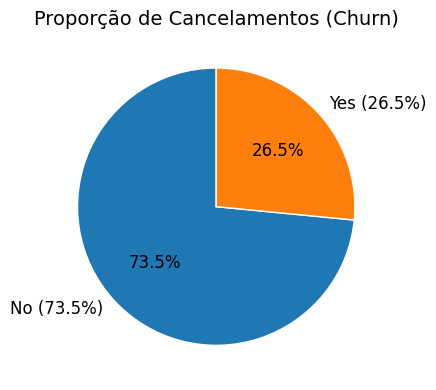

In [23]:
churn_counts = df['churn'].value_counts()
labels = [f'{label} ({value:.1f}%)' for label, value in zip(
    churn_counts.index,
    100 * churn_counts / churn_counts.sum()
)]

# Gráfico
plt.figure(figsize=(8, 4))
plt.pie(
    churn_counts,
    labels=labels,
    colors=['#1f77b4', '#ff7f0e'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12}
)
plt.title('Proporção de Cancelamentos (Churn)', fontsize=14)
plt.tight_layout()
plt.savefig('churn_pie.png',transparent=False, bbox_inches='tight', dpi=300 )
plt.show()

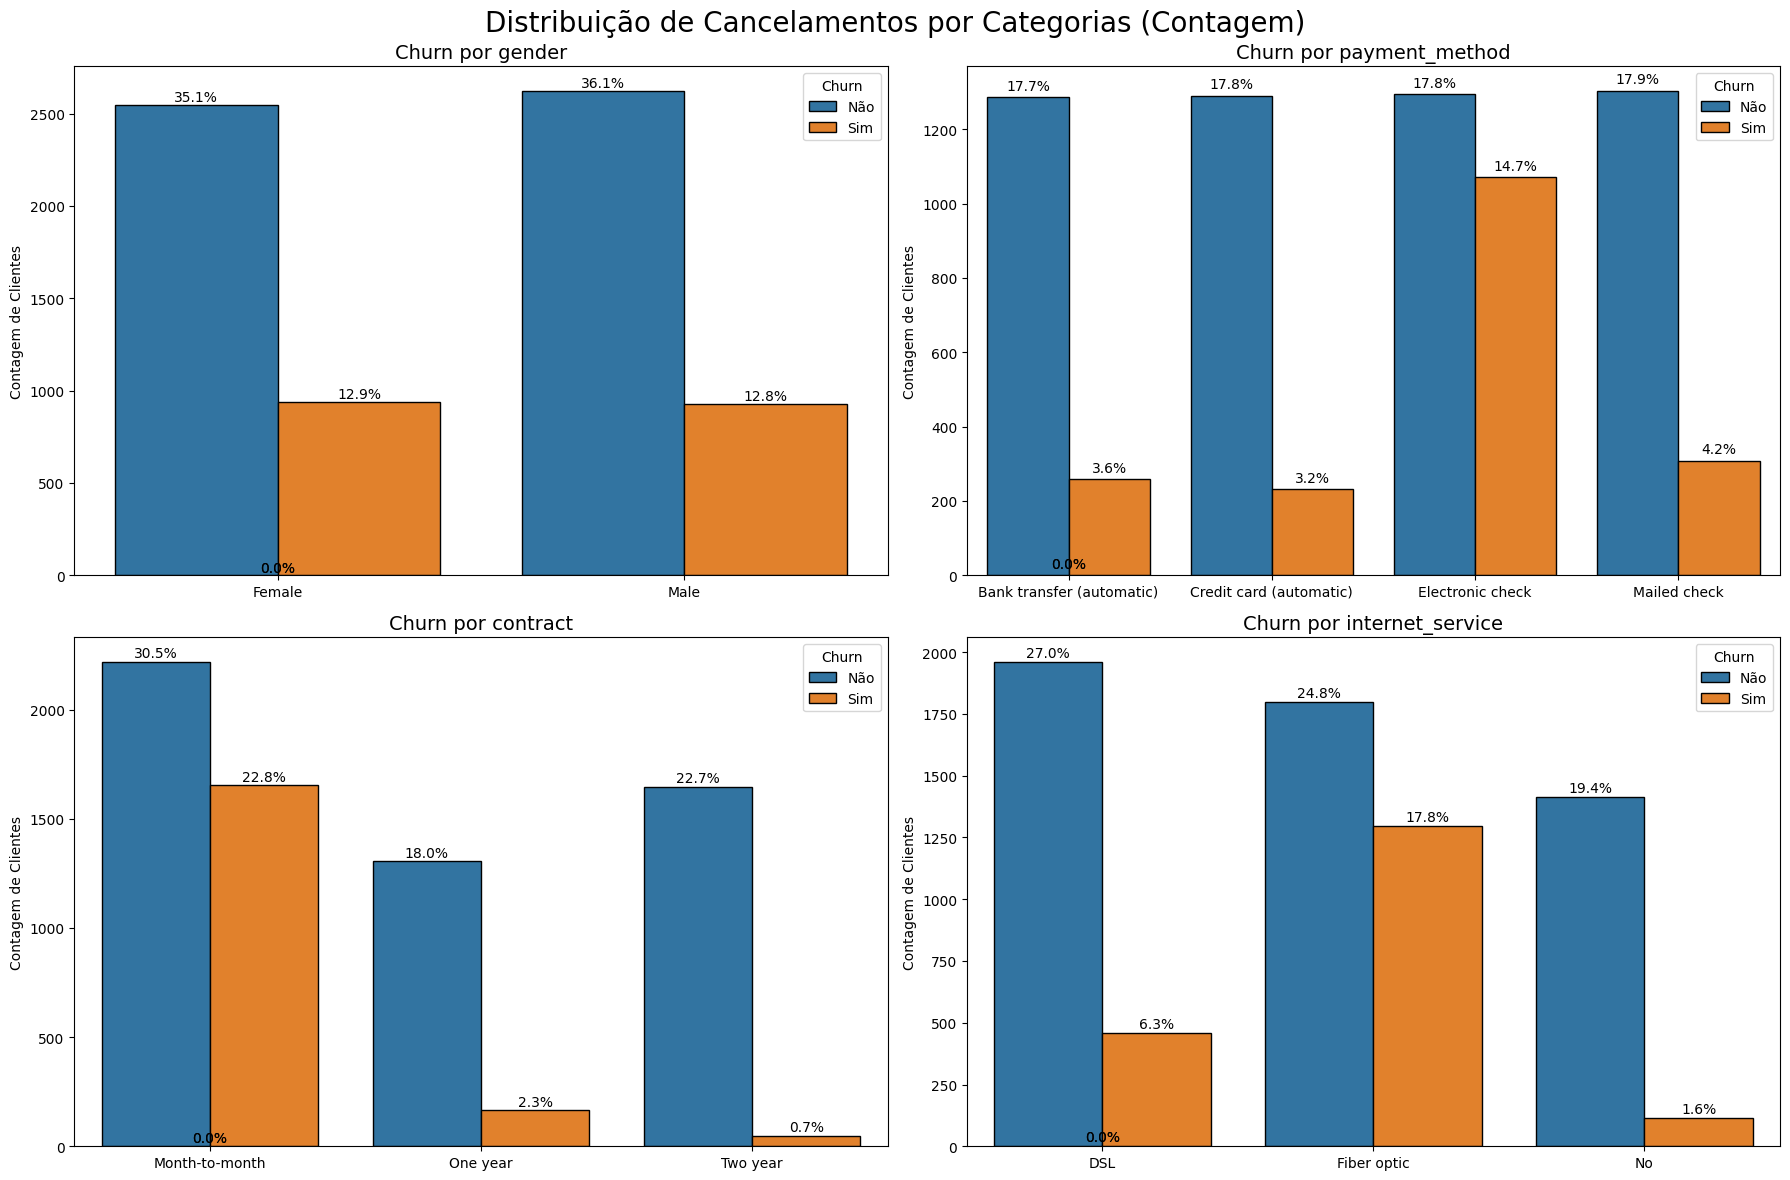

In [24]:
categorical_vars = ['gender', 'payment_method', 'contract', 'internet_service']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Distribuição de Cancelamentos por Categorias (Contagem)', fontsize=20)

for ax, cat_var in zip(axes.flatten(), categorical_vars):
    sns.countplot(
        x=cat_var,
        hue='churn',
        data=df,
        ax=ax,
        palette=['#1f77b4', '#ff7f0e'],
        edgecolor='black'
    )
    ax.set_title(f'Churn por {cat_var}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Contagem de Clientes')
    ax.legend(title='Churn', labels=['Não', 'Sim'])

    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 20,
            f'{height/total:.1%}',
            ha='center'
        )

plt.tight_layout()
plt.savefig('churn_grouped_bar.png',transparent=False, bbox_inches='tight', dpi=300 )
plt.show()

## Tempo Médio de Contrato

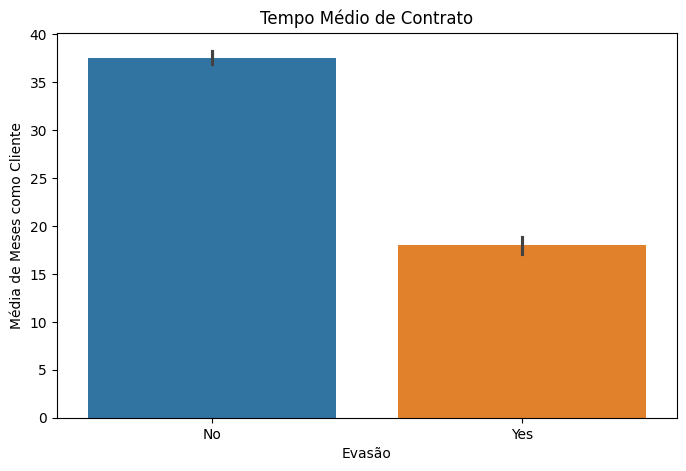

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='churn', y='tenure', data=df, hue='churn', palette=['#1f77b4', '#ff7f0e'], legend=False, estimator='mean')
plt.title('Tempo Médio de Contrato')
plt.xlabel('Evasão')
plt.ylabel('Média de Meses como Cliente')
plt.savefig('churn_bar_plot.png',transparent=False, bbox_inches='tight', dpi=300 )
plt.show()

## Distribuição de Evasão por Gasto Mensal

In [26]:
fig = px.histogram(
    df,
    x='monthly_charges',
    color='churn',
    nbins=30,
    barmode='overlay',
    opacity=0.7,
    color_discrete_map={'No': '#1f77b4', 'Yes': '#ff7f0e'},
    title='<b>Distribuição de Evasão por Gasto Mensal</b>',
    labels={'monthly_charges': 'Gasto Mensal (USD)'}
)
fig.show()

/usr/local/lib/python3.11/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## Distribuição das Discrepâncias de Cobrança

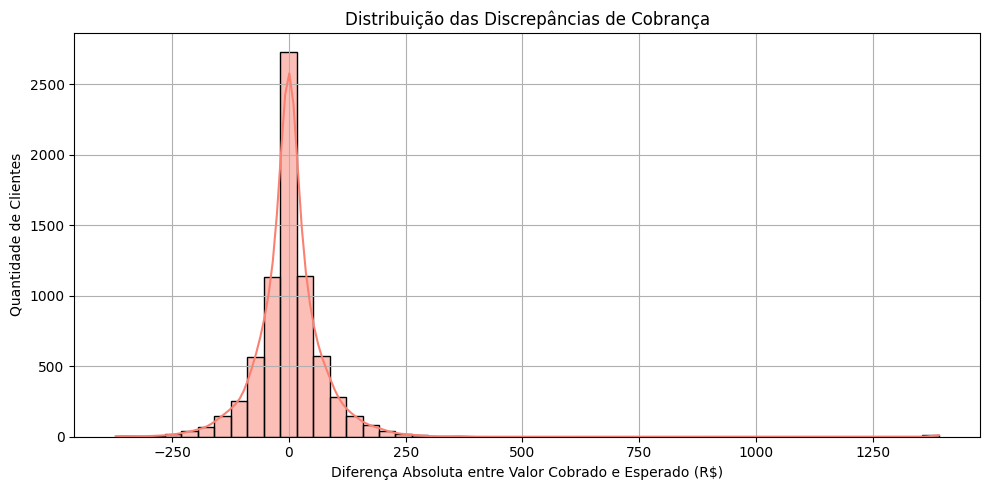

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['charge_discrepancy_abs'], bins=50, kde=True, color='salmon')
plt.title('Distribuição das Discrepâncias de Cobrança')
plt.xlabel('Diferença Absoluta entre Valor Cobrado e Esperado (R$)')
plt.ylabel('Quantidade de Clientes')
plt.grid(True)
plt.tight_layout()
plt.savefig('churn_histplot.png',transparent=False, bbox_inches='tight', dpi=300 )
plt.show()

## Distribuição de Gastos Diários por Evasão

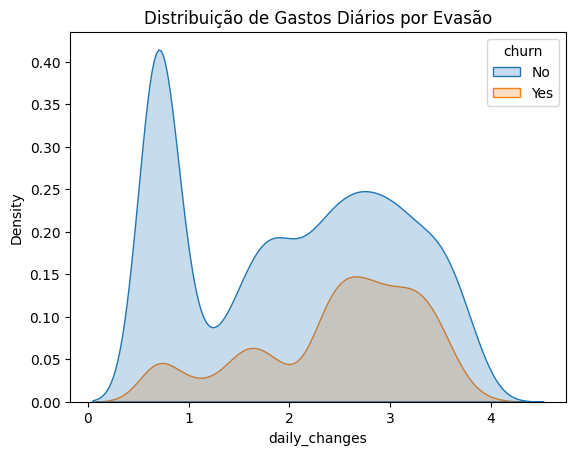

In [28]:
sns.kdeplot(data=df, x='daily_changes', hue='churn', fill=True)
plt.title('Distribuição de Gastos Diários por Evasão')
plt.savefig('churn_kdeplot.png',transparent=False, bbox_inches='tight', dpi=300 )
plt.show()

#📄Relatorio Final

## **1. Introdução**  
### **Objetivo**  
Este relatório tem como objetivo analisar os dados de clientes da uma empresa TelecomX de telecomunicações para identificar padrões relacionados ao **Churn** (evasão de clientes). A análise busca entender quais fatores influenciam o cancelamento de serviços e propor estratégias para reduzir essa taxa.  

### **Problema do Churn**  
O **Churn** é um dos principais desafios em empresas de telecomunicações, pois a perda de clientes impacta diretamente a receita e a sustentabilidade do negócio. Entender as causas do cancelamento permite à empresa:  
- **Retenção proativa**: Antecipar-se a possíveis cancelamentos.  
- **Oferta personalizada**: Melhorar planos e benefícios para clientes em risco.  
- **Redução de custos**: Evitar investimentos em aquisição de novos clientes para repor perdas.  

---

## **2. Limpeza e Tratamento de Dados**  
### **Fonte dos Dados**  
Os dados foram extraídos de um arquivo JSON disponível no GitHub, contendo informações sobre:  
- **Dados demográficos** (gênero, idade, dependentes)  
- **Serviços contratados** (internet, telefone, streaming)  
- **Faturamento** (cobrança mensal, total gasto, forma de pagamento)  

### **Etapas de Limpeza**  
1. **Padronização de Colunas**:  
   - Remoção de caracteres especiais e espaços.  
   - Renomeação para nomes mais descritivos (ex: `customer_gender` → `gender`).  

2. **Tratamento de Valores Ausentes**:  
   - Substituição de valores vazios em `total_charges` pela **mediana**.  

3. **Conversão de Tipos de Dados**:  
   - Colunas categóricas (`gender`, `partner`, `contract`) convertidas para `category`.  

4. **Criação de Novas Variáveis**:  
   - `daily_changes`: Cálculo diário de gastos (`monthly_charges / 30`).  
   - `total_charges_expected`: Valor esperado de cobrança (`monthly_charges * tenure`).  

5. **Identificação de Discrepâncias**:  
   - **91% dos registros** apresentam diferenças entre o valor cobrado e o esperado.  

---

## **3. Análise Exploratória de Dados**  
### **Distribuição de Churn**  
<img width='500px' src='https://i.imgur.com/JoRGt8t.png'>

*(Gráfico de Pizza)*

- **73,5% dos clientes permanecem** ("No").  
- **26,5% cancelam** ("Yes").  

### **Principais Fatores Relacionados ao Churn**  
#### **a) Tipo de Contrato**  
| Contrato        | Total de Clientes |  
|----------------|------------------|  
| Mês a mês      | 4005             |  
| 1 ano          | 1519             |  
| 2 anos         | 1743             |  

**Insight**: Clientes com contratos **longos (2 anos)** tendem a ter menor Churn.  

#### **b) Discrepâncias nas Cobranças**  
- **91% dos clientes** têm cobranças inconsistentes.  
- **5% apresentam diferenças superiores a 5%** do valor esperado.  

**Risco**: Cobranças incorretas podem levar a insatisfação e cancelamento.  

---

## **4. Conclusões e Insights**  
### **Principais Achados**  
1. **Contratos Longos Retêm Mais**:  
   - Clientes com planos anuais ou bienais têm menor taxa de evasão.  

2. **Cobranças Inconsistentes Afetam a Confiança**:  
   - A maioria dos clientes enfrenta problemas de cobrança, o que pode motivar o cancelamento.  

3. **Serviços Adicionais Influenciam a Permanência**:  
   - Clientes com **suporte técnico, segurança online e streaming** tendem a ficar mais tempo.  

---

## **5. Recomendações**  
### **Para Reduzir o Churn**  
✅ **Incentivar Planos Anuais/Bienais**:  
   - Oferecer **descontos** ou **benefícios exclusivos** para clientes que optem por contratos longos.  

✅ **Auditar Cobranças**:  
   - Corrigir discrepâncias e implementar **sistemas automatizados** para evitar erros.  

✅ **Melhorar Serviços de Suporte**:  
   - Oferecer **assistência técnica proativa** e **vantagens em streaming** para aumentar a retenção.  

✅ **Segmentação de Clientes em Risco**:  
   - Identificar perfis com maior probabilidade de cancelar e **oferecer promoções personalizadas**.  
